(scheme:lax-wendroff)=
# The Lax-Wendroff Scheme

The Lax-Wendroff scheme can be derived in several ways. We shall derive it from a *multi-step* perspective. The idea is to compute $u_m^{n+1}$ using not the time derivative at $t=n\Delta t$, but that at the *half-step* $t=n\Delta t + \Delta t/2=(n+1/2)\Delta t$

$$
	u_m^{n+1}=u_m^n+\Delta t\left(-c\frac{\partial u}{\partial x}\mid_{m,n+1/2}\right)
$$

To obtain the spatial derivative at the half-time step, we must have the function values at $t^{n+1/2}$, or

$$
	u_m^{n+1/2}=u_m^n+\frac{\Delta t}{2}\left(-c\frac{\partial u}{\partial x}\mid_{m,n}\right).
$$

The Lax-Wendroff method thus involves two steps:

 **1:** First, compute $\frac{\partial u}{\partial x}\mid_{m,n+1/2}$ using central differences, that involve the *mid-points* $m+1/2$ and $m-1/2$:

$$
	u_{m-1/2}^{n+1/2}=\frac{1}{2}(u_m^n+u_{m-1}^n)-c\frac{\Delta t}{2\Delta x}(u_m^n-u_{m-1}^n)
$$
$$
	u_{m+1/2}^{n+1/2}=\frac{1}{2}(u_{m+1}^n+u_{m}^n)-c\frac{\Delta t}{2\Delta x}(u_{m+1}^n-u_{m}^n)
$$
 **2:** Compute $u_m^{n+1}$ using the spatial derivative at $n+1/2$:

$$
	u_{m}^{n+1}=u_m^n-c\frac{\Delta t}{2\Delta x}(u_{m+1/2}^{n+1/2}-u_{m-1/2}^{n+1/2})
$$

## Consistency, stability and convergence

The scheme is 2nd order in time and space. To determine its stability we can express the scheme as:

$$
	u_m^{n+1} = \alpha u_{m-1}^n + \beta u_m^n + \gamma u_{m+1}^n
$$

with 

\begin{align}
	\alpha &= \frac{\sigma}{2}(\sigma + 1),\\
	\beta &= 1- \sigma^2, \\
	\gamma &= \frac{\sigma}{2}(\sigma - 1)
\end{align}

Assuming a solution of the type $B^n e^{i\lambda m \Delta x}$, the amplification factor is 

$$
	G=(1+\sigma^2(\cos \lambda \Delta x - 1)) - i\sigma \sin \lambda \Delta x
$$

which has a norm 

$$
	|G|^2 = 1-\sigma^2(1-\sigma^2)(1 - \cos \lambda \Delta x)^2.
$$

For the method to be stable, the condition is $|G|^2 \leq 1$ which provides the following stability condition

$$
	1-\sigma^2 \ge 0 \Leftrightarrow \sigma = \frac{c\Delta t}{\Delta x} \leq 1.
$$

which is the well-known CFL condition.

## Application: propagation of top hat function

As before, we apply the Lax-Wendroff scheme to the top hat initial condition.

In [1]:
def topHat(x):
   f0=np.zeros(x.shape)
   f0[(x>0.45) & (x<0.55)]=1

   return f0

The Lax-Wendroff scheme is implemented in the following Python function:

In [2]:
def LaxWendroff(u0,c,dt,dx,N,M):
    
    # Initial condition
    u=u0.copy()
    
    # Temporary arrays for step 1 solution
    um2=np.zeros((M-1,))
    up2=np.zeros((M-1,))

    # CFL number
    C = c*dt/dx
    
    for l in range(N):
        
        # Inflow B.C.
        u[0]  = u[0] - C * (u[0] - u[M-2])
        
        # Step 1: compute u at mid-points m +/- 1/2 and half-step n+1/2
        
        um2=0.5*(u[1:-1]+u[0:-2])-C/2*(u[1:-1]-u[0:-2])
        up2=0.5*(u[2:]+u[1:-1])-C/2*(u[2:]-u[1:-1])
        
        # Step 2
        u[1 : M-1] = u[1 : M-1] - C*(up2-um2)
        
        u[M-1]  = u[0]
    
    return u

In the next code snippet, we set the discretization parameters and integrate the initial condition with the Lax-Wendroff scheme:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N     = 30       # Number of time steps
M     = 100      # Number of grid points
c     = 0.75     # Propagation speed

dt = 0.01
dx = 1/M

print("Number of time steps = {:d}".format(N))
print("Number of grid points = {:d}".format(M))
print("Time step = {:f}".format(dt))
print("Grid size = {:f}".format(dx))
print("CFL number = {:f}".format(c*dt/dx))

# Grid points
X=np.linspace(0,1,M)

# Integrate the initial condition N time steps
U=LaxWendroff(topHat(X),c,dt,dx,N,M)

Number of time steps = 30
Number of grid points = 100
Time step = 0.010000
Grid size = 0.010000
CFL number = 0.750000


The solution at the end of the integration is shown below:

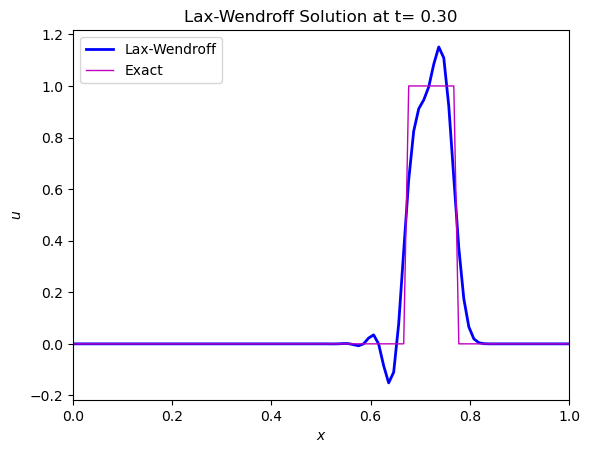

In [4]:
# Shift the exact solution a distance equivalent to c*N*dt
newX = np.mod(X-c*N*dt,1)

fig, ax0 = plt.subplots()

ax0.plot(X, U, lw = 2, color = "b",  label='Lax-Wendroff')
ax0.plot(X, topHat(newX), lw = 1, color = "m",  label='Exact')

ax0.set_title("Lax-Wendroff Solution at t={:5.2f}".format(N*dt))
ax0.set_xlabel('$x$')
ax0.set_xlim([0, 1])
ax0.set_ylabel('$u$')
ax0.legend()

plt.show()

The Lex-Wendroff scheme avoids the excessive numerical diffusion of the Upwind scheme, but oscillations are still visible at the sharp transitions of the top hat function. These oscillations are known as the Gibbs phenomenon.